## Real life application of GBM. Possible paths for Apple (next 100 trading days)

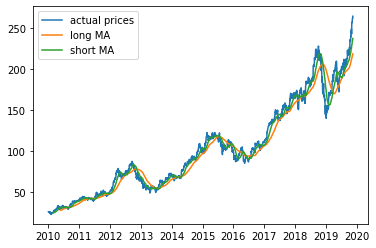

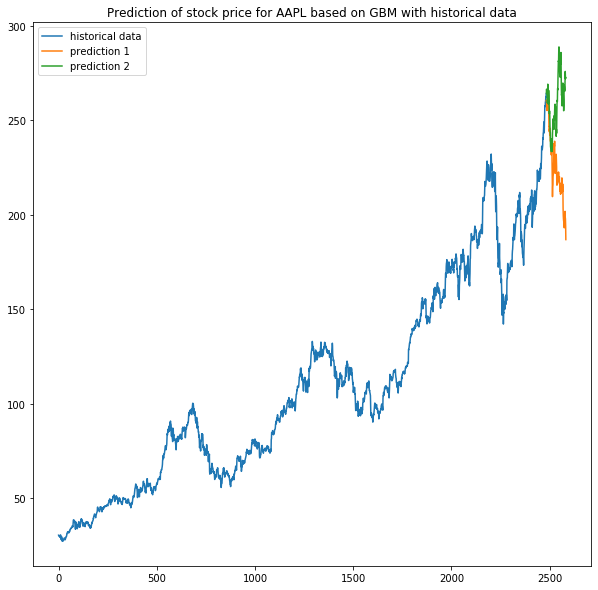

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import numpy as np
np.random.seed(1991)

# Parameters
scen_size = 2 # Number of paths
T = 100 # Number of (trading) days for prediction
start_date = '2010-01-01' 
end_date = date.today()

# Load data
AAPL = data.DataReader('AAPL', 'yahoo', start_date, end_date)

# Compute moving averages
short_rolling = AAPL.rolling(window=40).mean()
long_rolling = AAPL.rolling(window=100).mean()

# Plot prices
plt.plot(AAPL['Adj Close'], label='actual prices')
plt.plot(long_rolling['Adj Close'], label='long MA')
plt.plot(short_rolling['Adj Close'], label='short MA')
plt.legend()
plt.show()
plt.close()

# Compute returns
data = AAPL.sort_index(ascending=True, axis=0)
ret = np.log(data['Adj Close']).diff()
data['Return'] = ret

# GBM parameters
S0 = data['Adj Close'][-1]
dt = 1 #daily
N = T/dt
t = np.arange(1, int(N) + 1)
mu = np.mean(ret)
sigma = np.std(ret)

b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)} #noise
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)} #BM
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

# Predictions
S = np.array([S0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[S0] for scen in range(scen_size)]), S))

# Plot
prices = data['Close']
split = len(prices)
prices.reset_index(drop=True, inplace=True)
fig = plt.figure(figsize=(10,10))
plt.plot(prices, label='historical data')
for i in range(scen_size):
    tmp1 = prices
    tmp2 = pd.DataFrame(S[i,1:])
    tmp1 = tmp1.append(tmp2)
    tmp1.reset_index(drop=True, inplace=True)
    plt.plot(tmp1[split:], label=('prediction ' + str(i+1)))
plt.title('Prediction of stock price for AAPL based on GBM with historical data')
plt.legend()
plt.savefig('Stock prices predictions.pdf')
plt.show()
plt.close()